In [2]:
import	numpy	as	np
from	keras.datasets	import	imdb
from	keras	import	models
from	keras	import	layers
from	keras	import	optimizers
from	keras	import	losses
from	keras	import	metrics
import	matplotlib.pyplot	as	plt
%matplotlib inline

In [3]:
(train_data,	train_labels),	(test_data,	test_labels)	=	imdb.load_data(num_words	=	10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
train_labels[0]

np.int64(1)

In [7]:
print(type([max(sequence)	for	sequence	in	train_data]))
max([max(sequence)	for	sequence	in	train_data])

<class 'list'>


9999

In [8]:
word_index	=	imdb.get_word_index()
reverse_word_index	=	dict([(value,	key)	for	(key,	value)	in	word_index.items()])
decoded_review	=	'	'.join([reverse_word_index.get(i-3,	'?')	for	i	in	train_data[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


"?\tthis\tfilm\twas\tjust\tbrilliant\tcasting\tlocation\tscenery\tstory\tdirection\teveryone's\treally\tsuited\tthe\tpart\tthey\tplayed\tand\tyou\tcould\tjust\timagine\tbeing\tthere\trobert\t?\tis\tan\tamazing\tactor\tand\tnow\tthe\tsame\tbeing\tdirector\t?\tfather\tcame\tfrom\tthe\tsame\tscottish\tisland\tas\tmyself\tso\ti\tloved\tthe\tfact\tthere\twas\ta\treal\tconnection\twith\tthis\tfilm\tthe\twitty\tremarks\tthroughout\tthe\tfilm\twere\tgreat\tit\twas\tjust\tbrilliant\tso\tmuch\tthat\ti\tbought\tthe\tfilm\tas\tsoon\tas\tit\twas\treleased\tfor\t?\tand\twould\trecommend\tit\tto\teveryone\tto\twatch\tand\tthe\tfly\tfishing\twas\tamazing\treally\tcried\tat\tthe\tend\tit\twas\tso\tsad\tand\tyou\tknow\twhat\tthey\tsay\tif\tyou\tcry\tat\ta\tfilm\tit\tmust\thave\tbeen\tgood\tand\tthis\tdefinitely\twas\talso\t?\tto\tthe\ttwo\tlittle\tboy's\tthat\tplayed\tthe\t?\tof\tnorman\tand\tpaul\tthey\twere\tjust\tbrilliant\tchildren\tare\toften\tleft\tout\tof\tthe\t?\tlist\ti\tthink\tbecause\tthe\tst

In [9]:
len(reverse_word_index)

88584

In [10]:
def	vectorize_sequences(sequences,	dimension=10000):
 results	=	np.zeros((len(sequences),	dimension))
 for	i,sequence	in	enumerate(sequences):
  results[i,sequence]	=	1
 return	results
X_train	=	vectorize_sequences(train_data)
X_test	=	vectorize_sequences(test_data)

In [11]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
X_train.shape

(25000, 10000)

In [13]:
y_train	=	np.asarray(train_labels).astype('float32')
y_test=	np.asarray(test_labels).astype('float32')

In [14]:
model	=	models.Sequential()
model.add(layers.Dense(16,	activation='relu',	input_shape=(10000,)))
model.add(layers.Dense(16,	activation='relu'))
model.add(layers.Dense(1,	activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
 optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss	=	losses.binary_crossentropy,
 metrics	=	[metrics.binary_accuracy]
)

In [16]:
X_val	=	X_train[:10000]
partial_X_train	=	X_train[10000:]
y_val	=	y_train[:10000]
partial_y_train	=	y_train[10000:]

In [17]:
history	=	model.fit(
 partial_X_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(X_val,	y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - binary_accuracy: 0.6949 - loss: 0.6014 - val_binary_accuracy: 0.8661 - val_loss: 0.3985
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - binary_accuracy: 0.8958 - loss: 0.3383 - val_binary_accuracy: 0.8827 - val_loss: 0.3172
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - binary_accuracy: 0.9234 - loss: 0.2416 - val_binary_accuracy: 0.8892 - val_loss: 0.2881
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - binary_accuracy: 0.9352 - loss: 0.1991 - val_binary_accuracy: 0.8876 - val_loss: 0.2755
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - binary_accuracy: 0.9529 - loss: 0.1605 - val_binary_accuracy: 0.8856 - val_loss: 0.2774
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9621 - loss: 0.1357 - val_binary_accuracy: 0.8722 - val_loss: 0.3258
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - binary_accuracy: 0.9598 - loss: 0.1290 - val_binary_accuracy: 0.8742 - val_loss: 0.3303
Epoch 8/20
30

In [18]:
history_dict	=	history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


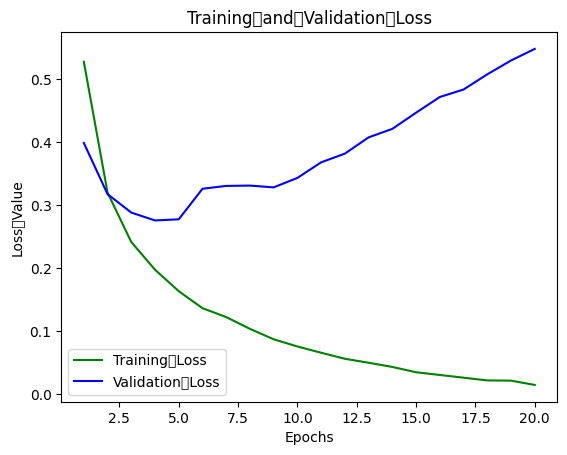

In [20]:
loss_values	=	history_dict['loss']
val_loss_values	=	history_dict['val_loss']
epochs	=	range(1,	len(loss_values)	+	1)
plt.plot(epochs,	loss_values,	'g',	label="Training	Loss")
plt.plot(epochs,	val_loss_values,	'b',	label="Validation	Loss")
plt.title('Training	and	Validation	Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss	Value')
plt.legend()
plt.show()


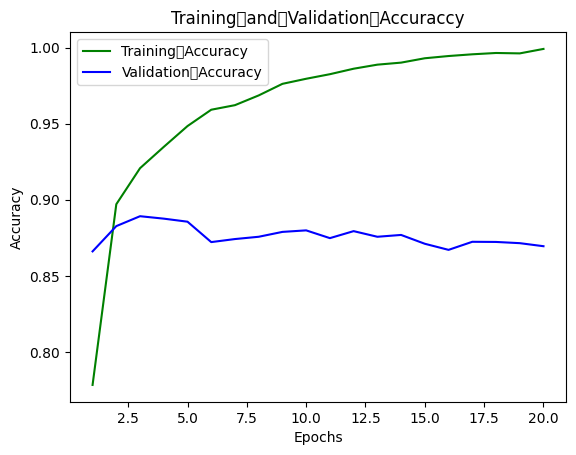

In [21]:
acc_values	=	history_dict['binary_accuracy']
val_acc_values	=	history_dict['val_binary_accuracy']
epochs	=	range(1,	len(loss_values)	+	1)
plt.plot(epochs,	acc_values,	'g',	label="Training	Accuracy")
plt.plot(epochs,	val_acc_values,	'b',	label="Validation	Accuracy")
plt.title('Training	and	Validation	Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.fit(
partial_X_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(X_val,	y_val)
)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - binary_accuracy: 0.9996 - loss: 0.0106 - val_binary_accuracy: 0.8630 - val_loss: 0.5902
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - binary_accuracy: 0.9998 - loss: 0.0085 - val_binary_accuracy: 0.8710 - val_loss: 0.5988
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - binary_accuracy: 0.9978 - loss: 0.0119 - val_binary_accuracy: 0.8698 - val_loss: 0.6151


In [23]:
np.set_printoptions(suppress=True)
result	=	model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [24]:
result

array([[0.00843392],
       [1.        ],
       [0.95366067],
       ...,
       [0.00151669],
       [0.00682675],
       [0.95469785]], dtype=float32)

In [29]:
y_pred	=	np.zeros(len(result))
for	i,	score	in	enumerate(result):
		y_pred[i]	=	np.round(score)
mae	=	metrics.mean_absolute_error(y_pred,	y_test)
mae

<ipython-input-29-332ef9af419a>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i]	=	np.round(score)


<tf.Tensor: shape=(), dtype=float32, numpy=0.14232000708580017>